### Name : Weerasinghe K.N.
### Index No : 190672T

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import math
style.use('dark_background')

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Question 1

> *Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b*


Text(0.5, 1.0, 'Image after transformation')

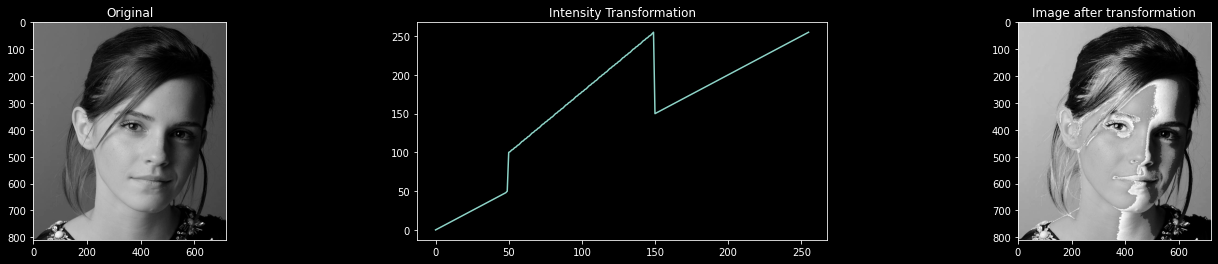

In [3]:
img = cv.imread("emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert img is not None

fig,ax = plt.subplots(1,3)
fig.set_figwidth(25)

t1=np.linspace(0,50,50)
t2=np.linspace(50,100,0)
t3=np.linspace(100,255,100)
t4=np.linspace(255,150,0)
t5=np.linspace(150,255,106)

t=np.concatenate((t1,t2,t3,t4,t5), axis=0).astype(np.uint8)
IT=cv.LUT(img,t)

ax[0].imshow(img,cmap="gray")
ax[0].set_title('Original')
ax[1].plot(t)
ax[1].set_title('Intensity Transformation')
ax[2].imshow(IT,cmap="gray")
ax[2].set_title('Image after transformation')

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Question 2

> *Apply a similar operation as above (question 1) to accentuate <br>(a) white matter<br>(b) gray matter<br>in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots.*

Text(0.5, 1.0, 'white matte')

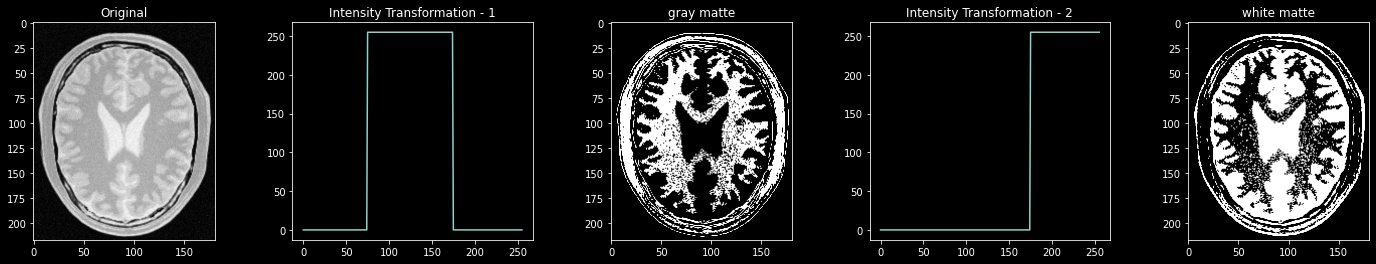

In [4]:
img = cv.imread("brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert img is not None

fig,ax = plt.subplots(1,5)
fig.set_figwidth(25)

t11=np.linspace(0,0,75)
t12=np.linspace(255,255,100)
t13=np.linspace(0,0,81)
t21=np.linspace(0,0,175)
t22=np.linspace(255,255,81)

t1=np.concatenate((t11,t12,t13), axis=0).astype(np.uint8)
IT1=cv.LUT(img,t1)

t2=np.concatenate((t21,t22), axis=0).astype(np.uint8)
IT2=cv.LUT(img,t2)

ax[0].imshow(img,cmap="gray")
ax[0].set_title('Original')
ax[1].plot(t1)
ax[1].set_title('Intensity Transformation - 1')
ax[2].imshow(IT1,cmap="gray")
ax[2].set_title('gray matte')
ax[3].plot(t2)
ax[3].set_title('Intensity Transformation - 2')
ax[4].imshow(IT2,cmap="gray")
ax[4].set_title('white matte')

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Question 3

> *Consider the image shown in Fig. 3 <br>(a) Apply gamma correction to the L plane in the L∗a∗b∗ color space and state the γ value. <br>(b) Show the histograms of the original and corrected images.*

Text(0.5, 1.0, 'Histogram of the corrected image')

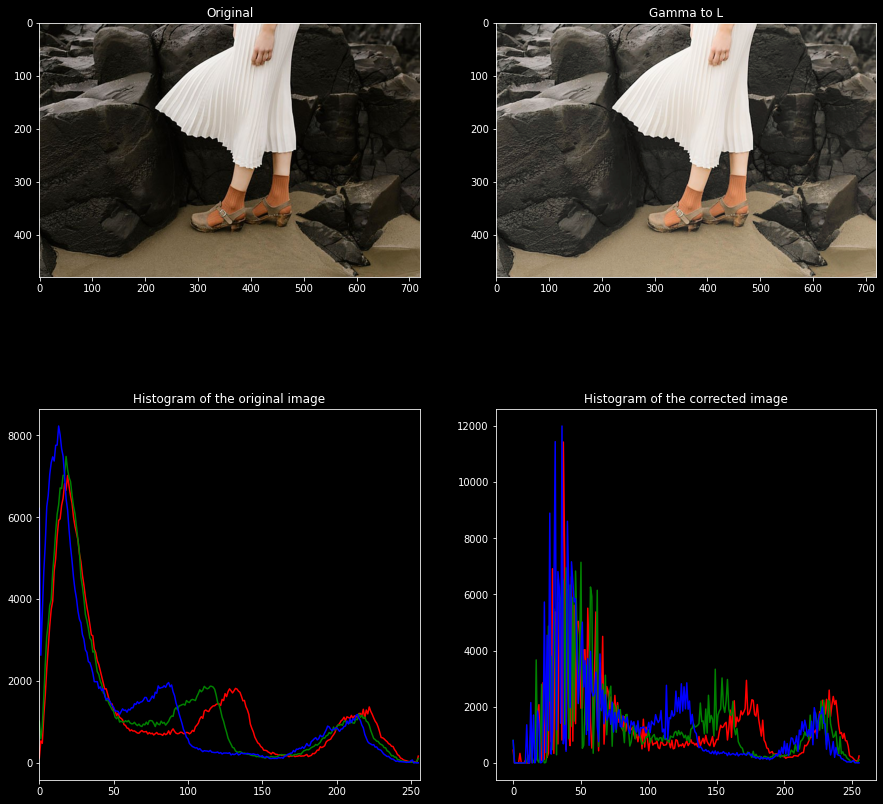

In [5]:
def gam_cor(img0,gamma):
    img_gam=np.array([(p/256)**gamma*256 for p in range (0,256)]).astype(np.uint8)
    gam=cv.LUT(img0,img_gam)
    return gam

img = cv.imread("highlights_and_shadows.jpg",cv.IMREAD_COLOR)
assert img is not None
img=cv.cvtColor(img,cv.COLOR_BGR2RGB) #color conversion
fig,ax = plt.subplots(2,2)
fig.set_figwidth(15)
fig.set_figheight(15)


ax[0][0].imshow(img)
ax[0][0].set_title('Original')

color=("r","g","b")

hist=[0,0,0]
for i,c in enumerate(color):
    hist=cv.calcHist([img],[i],None,[256],[0,256])
    ax[1][0].plot(hist,color=c)
    ax[1][0].set_xlim([0, 256])

ax[1][0].set_title('Histogram of the original image')

img=cv.cvtColor(img,cv.COLOR_RGB2LAB)
l,a,b=cv.split(img)
gamma=0.6

lg=gam_cor(l,gamma)
gimg=cv.merge([lg,a,b])
ax[0][1].imshow(cv.cvtColor(gimg, cv.COLOR_LAB2RGB))
ax[0][1].set_title('Gamma to L')

imgg=cv.cvtColor(gimg, cv.COLOR_LAB2RGB)
hist1=[0,0,0]
for i,c in enumerate(color):
    hist1=cv.calcHist([imgg],[i],None,[256],[0,256])
    ax[1][1].plot(hist1,color=c)

ax[1][1].set_title('Histogram of the corrected image')


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Question 4

> *Write a function of your own to carry out histogram equalization on the image shown in Fig. 4. Show the histograms before and after equalization.*

Text(0.5, 1.0, 'Histogram - Normalized')

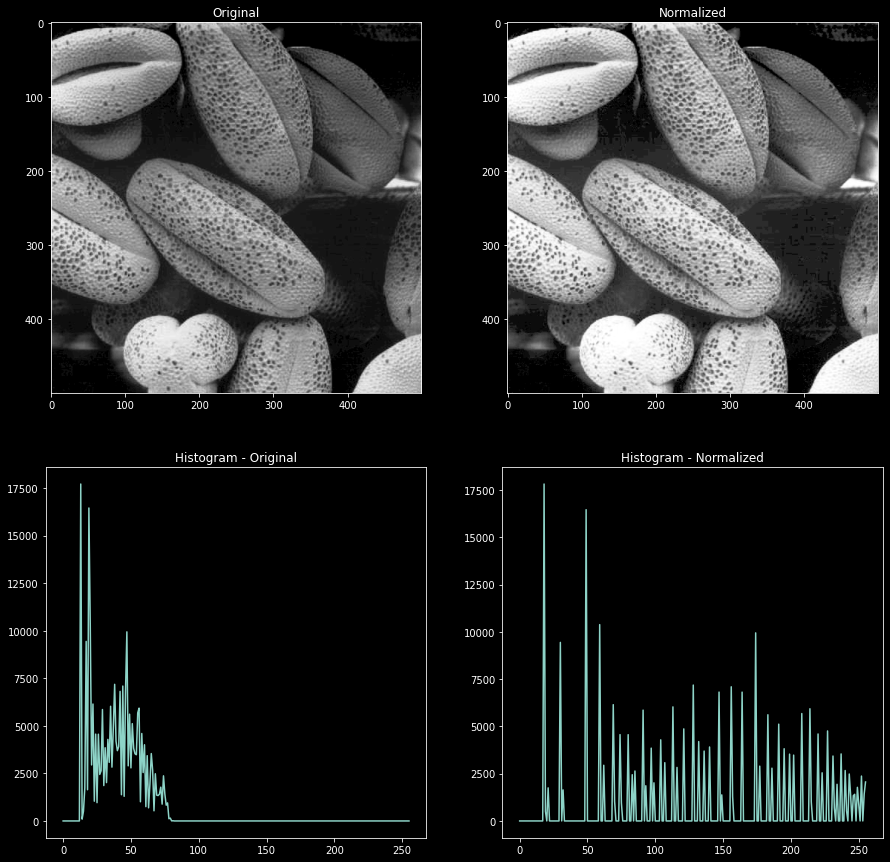

In [6]:
def histogram(img):
    hist,bins=np.histogram(img.ravel(),256,[0,256])
    cdf=hist.cumsum()
    cdf_n=cv.multiply(256/img.size,cdf)
    img_g=cv.LUT(img,cdf_n)
    return img_g

img = cv.imread("shells.png",cv.IMREAD_GRAYSCALE)
assert img is not None
fig,ax = plt.subplots(2,2)
fig.set_figwidth(15)
fig.set_figheight(15)

ax[0][0].imshow(img,cmap="gray")
ax[0][0].set_title('Original')

hist,bins=np.histogram(img.ravel(),256,[0,256])
ax[1][0].plot(hist)
ax[1][0].set_title('Histogram - Original')

img_n=histogram(img)

ax[0][1].imshow(img_n,cmap="gray")
ax[0][1].set_title('Normalized')

hist_n,bins=np.histogram(img_n.ravel(),256,[0,256])
ax[1][1].plot(hist_n)
ax[1][1].set_title('Histogram - Normalized')

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Question 5

> *Write a program to zoom images by a given factor s ∈ (0,10]. You must use a function to zoom the image, which can handle <br>(a) nearest-neighbor, and <br>(b) bilinear interpolation. <br>I have included four images, two large originals, and there zoomed-out versions. Test you algorithm by computing the normalized sum of squared difference (SSD) when you scale-up the given small images by a factor of 4 by comparing with the original images.*

(495, 350, 3)


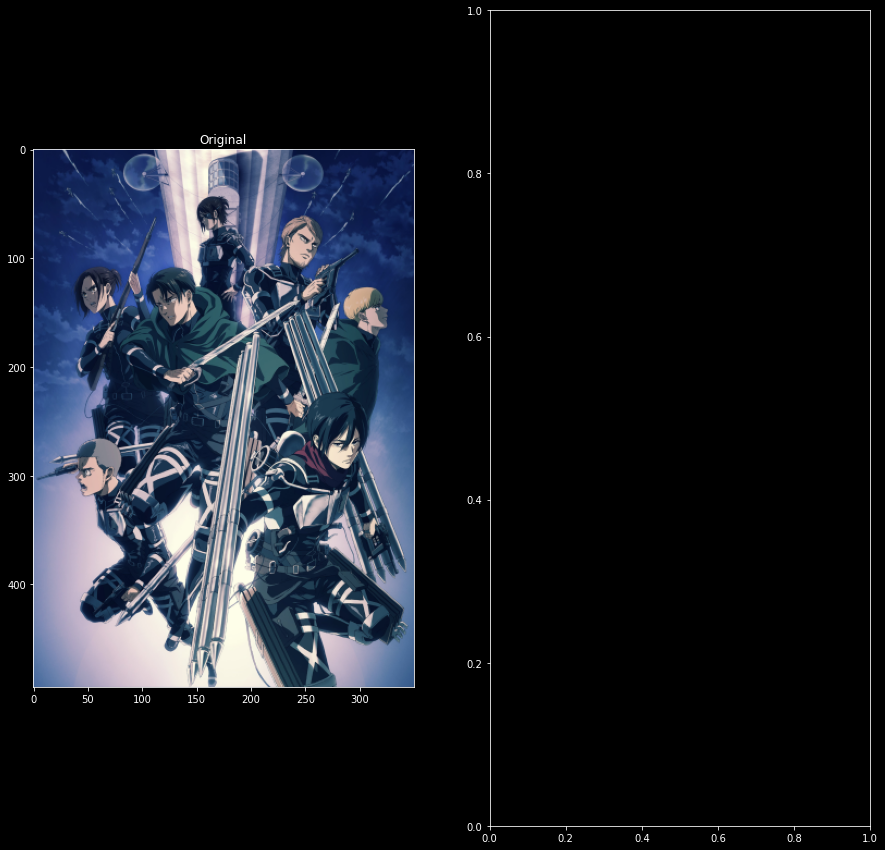

In [12]:
img=cv.imread("attack on titan.png",cv.IMREAD_COLOR)
assert img is not None

fig,ax = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(15)
print(img.shape)
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original')

scale =10
rows=int(scale*img.shape[0])
cols=int(scale*img.shape[1])

zoomed=np.zeros((rows,cols),dtype=img.dtype)

for i in range(0,rows):
    for j in range(0,cols):
        zoomed[i,j]=img[int(i/scale),int(j/scale)]

ax[1].imshow(cv.cvtColor(zoomed, cv.COLOR_BGR2RGB))
ax[1].set_title('Zoomed')

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Question 6

> <em>Filtering with the Sobel operator can compute the gradient. Consider the image shown in Fig. 5<br>(a) Using the existing filter2D to Sobel filter the image.<br>(b) Write your own code to Sobel filter the image.<br>(c) Using the property$$\begin{bmatrix}1 & 0 & -1\\2 & 0 & -2\\1 & 0 & -1\end{bmatrix} = \begin{bmatrix}1 \\2 \\1 \end{bmatrix} * \begin{bmatrix}1 & 0 & -1\end{bmatrix}$$<br>carry out Sobel filtering.</em>

[1. 2. 1.]


Text(0.5, 1.0, 'Gradient using convolution')

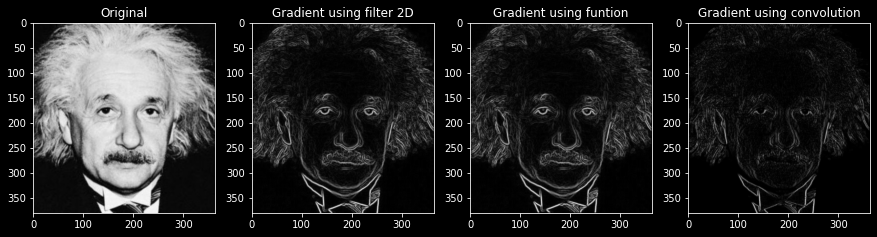

In [8]:
img=cv.imread("einstein.png",cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

fig,ax = plt.subplots(1,4)
fig.set_figwidth(15)
fig.set_figheight(15)

#using filter 2D

kernalx = np.array ([(1,2,1),(0,0,0),(-1,-2,-1)],dtype=np.float32)
kernaly = np.array ([(1,0,-1),(2,0,-2),(1,0,-1)],dtype=np.float32)

imgx=cv.filter2D(img,-1,kernalx)
imgy=cv.filter2D(img,-1,kernaly)

grad_mag=(imgx**2+imgy**2)**0.5

ax[0].imshow(img,cmap="gray")
ax[0].set_title('Original')
ax[1].imshow(grad_mag,cmap="gray")
ax[1].set_title('Gradient using filter 2D')

#using own function

def filter(img,kernal):
    assert kernal.shape[0]%2 == 1 and kernal.shape[1]%2 ==1
    k_hh,k_hw=math.floor(kernal.shape[0]/2),math.floor(kernal.shape[1]/2)
    h,w=img.shape
    image_float=cv.normalize(img.astype("float"),None,0.0,1.0,cv.NORM_MINMAX)
    result=np.zeros(img.shape,"float")
    for m in range(k_hh,h-k_hh):
        for n in range(k_hw,w-k_hw):
            result[m,n]=np.dot(image_float[m-k_hh:m+k_hh+1,n-k_hw:n+k_hw+1].flatten(),kernal.flatten())
    return result

imgx=filter(img,kernalx)
imgy=filter(img,kernaly)

grad_mag=(imgx**2+imgy**2)**0.5

ax[2].imshow(grad_mag,cmap="gray")
ax[2].set_title('Gradient using funtion')

#using convolution

kernal1=np.array ([(1),(2),(1)],dtype=np.float32)
print(kernal1)
kernal2=np.array ([(1,0,-1)],dtype=np.float32)

img1=cv.filter2D(img,-1,kernal1)
img2=cv.filter2D(img,-1,kernal2)

#grad_mag=(imgx**2+imgy**2)**0.5
imgy=img1*img2

img11=cv.transpose(img1)
img21=cv.transpose(img2)
imgx=cv.transpose(img21*img11)
grad_mag=(imgx**2+imgy**2)**0.5

ax[3].imshow(grad_mag,cmap="gray")
ax[3].set_title('Gradient using convolution')

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Question 7

> *Fig. $6^2$ shows a flower image with both the foreground and background are in focus <br>(a) Use grabCut to segment the image. Show the final segmentation mask, foreground image, and background image.<br>(b) Produce an enhanced image with a substantially blurred background. Display the original image alongside the enhanced image <br>(c) Why is the background just beyond the edge of the flower quite dark in the enhanced image?*

(841, 561, 3)


Text(0.5, 1.0, 'Enhanced Image')

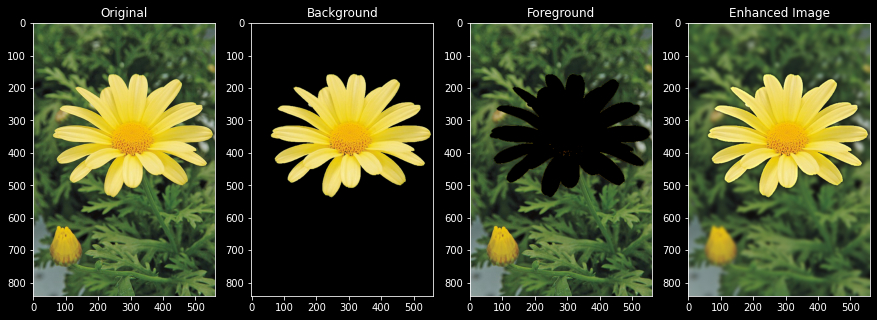

In [9]:
img=cv.imread("daisy.jpg",cv.IMREAD_COLOR)
assert img is not None

fig,ax = plt.subplots(1,4)
fig.set_figwidth(15)
fig.set_figheight(15)

print(img.shape)
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original')

mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (40,120,560,500)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,10,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img1 = img*mask2[:,:,np.newaxis]
img2 = cv.subtract(img,img1)

ax[1].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax[1].set_title('Background')

ax[2].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[2].set_title('Foreground')

blurIm=cv.GaussianBlur(img2,(25,25),0)
img3=cv.add(blurIm,img1)

ax[3].imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
ax[3].set_title('Enhanced Image')